In [25]:
# ============================================
#   AIRBNB PRICE PREDICTION
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Display settings
pd.set_option('display.max_columns', None)



In [26]:
# Upload the file
uploaded = files.upload()

Saving airbnb.csv to airbnb (1).csv


In [27]:
file_path = "airbnb.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [28]:
# ============================================
#   DATA CLEANING
# ============================================

# Remove duplicates
df.drop_duplicates(inplace=True)

# Clean price column ($, commas, etc.)
df['price'] = (
    df['price']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)


<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-225753004.py:11: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


In [30]:
# Only run the actual Python code:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    # ... rest of your imputation code
    pass

In [31]:
# Fill missing text values
text_cols = ['name','host_name','address','amenities']
for col in text_cols:
    if col in df.columns:
        df[col].fillna("Unknown", inplace=True)

print("✔ Data cleaning complete!")
df.head()


✔ Data cleaning complete!


/tmp/ipython-input-3877991847.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078.0,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,4665.0,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,5991.0,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,11339.0,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,6673.0,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [32]:
# ============================================
#   BASIC STATS
# ============================================
print("Summary Statistics:")
df.describe(include='all')


Summary Statistics:


,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
count,12805.000000,1.280500e+04,12805,12805,12805,12805,1.280500e+04,12805,12805,12805,12805,12805,12805,1.280500e+04,12805,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12805.000000,12005,10355
unique,NaN,NaN,12716,77,409,6838,NaN,6287,2548,11630,257,5800,12711,NaN,148,NaN,NaN,NaN,NaN,NaN,NaN,153,21
top,NaN,NaN,Dorm Bed in Traditional Ger - Mongol Ujin Camp,New,0,Onda,NaN,"Manali, Himachal Pradesh, India","2 guests,1 bedroom,1 bed,1 bathroom","Long-term stays allowed,Unavailable: Carbon mo...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...",Check-in: After 3:00 pm,https://a0.muscache.com/im/pictures/miso/Hosti...,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,After 3 00 pm,11 00 am
freq,NaN,NaN,6,4238,2393,58,NaN,179,1143,27,3717,207,5,NaN,2766,NaN,NaN,NaN,NaN,NaN,NaN,2554,4391
mean,6402.000000,7.525187e+16,NaN,NaN,NaN,NaN,1.638192e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.769780e+04,NaN,1.874424,3.316751,5.213745,0.019211,2.136041,0.023585,NaN,NaN
std,3696.629433,2.007933e+17,NaN,NaN,NaN,NaN,1.413622e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.569364e+04,NaN,2.091399,4.037791,3.808830,0.137272,2.359005,0.151757,NaN,NaN
min,0.000000,1.313100e+04,NaN,NaN,NaN,NaN,2.303900e+04,NaN,NaN,NaN,NaN,NaN,NaN,3.930000e+02,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,3201.000000,2.023958e+07,NaN,NaN,NaN,NaN,3.700032e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.994000e+03,NaN,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,NaN,NaN
50%,6402.000000,3.682229e+07,NaN,NaN,NaN,NaN,1.256459e+08,NaN,NaN,NaN,NaN,NaN,NaN,8.175000e+03,NaN,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,NaN,NaN
75%,9603.000000,4.999760e+07,NaN,NaN,NaN,NaN,2.639623e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.606200e+04,NaN,2.000000,4.000000,6.000000,0.000000,3.000000,0.000000,NaN,NaN


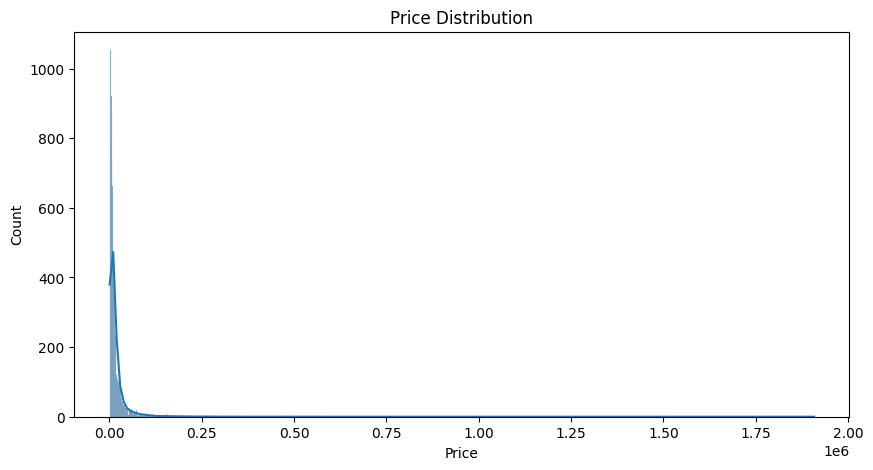

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


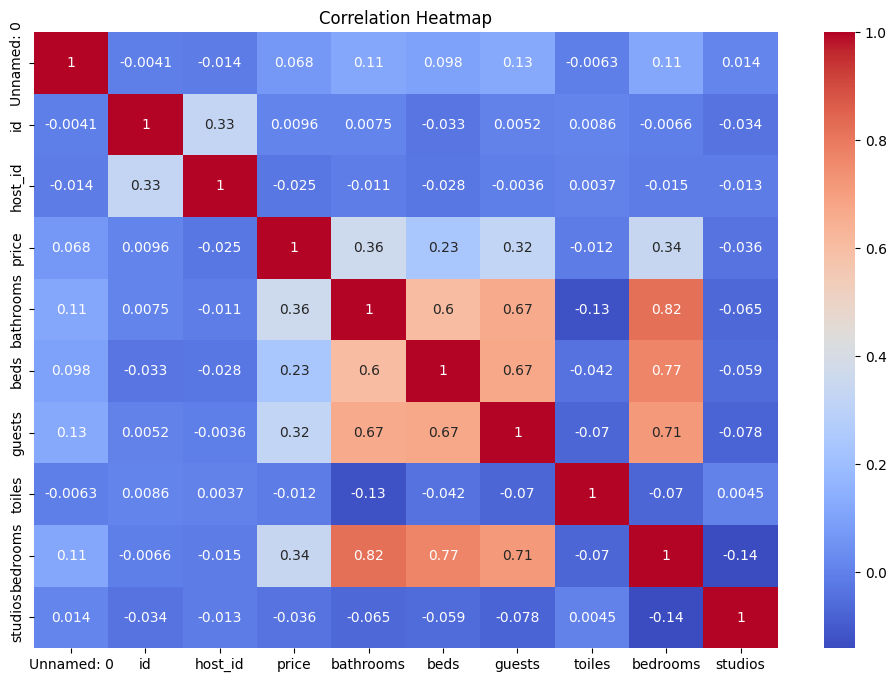

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


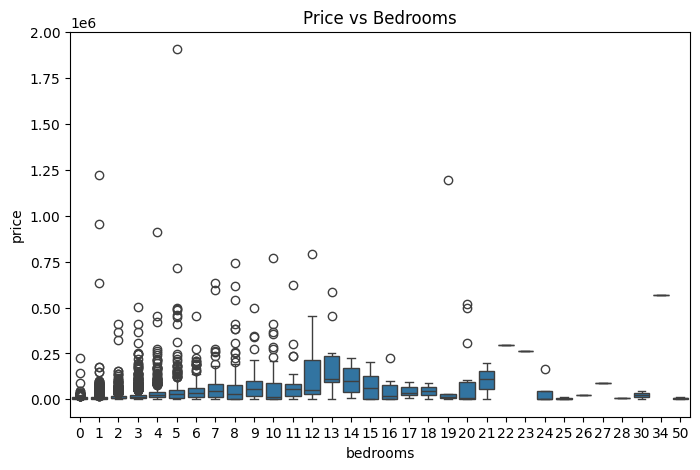

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title("Price vs Bedrooms")
plt.show()


In [36]:
# ============================================
#   FEATURE ENGINEERING
# ============================================

# Amenity count
df['amenity_count'] = df['amenities'].apply(lambda x: len(str(x).split(',')))

# Price per guest
df['price_per_guest'] = df['price'] / df['guests'].replace({0:1})

# One-hot encode country
if 'country' in df.columns:
    df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Check-in / Check-out hours
df['checkin_hour'] = pd.to_datetime(df['checkin'], errors='coerce').dt.hour
df['checkout_hour'] = pd.to_datetime(df['checkout'], errors='coerce').dt.hour

df['checkin_hour'].fillna(df['checkin_hour'].median(), inplace=True)
df['checkout_hour'].fillna(df['checkout_hour'].median(), inplace=True)

print("✔ Feature engineering complete!")
df.head()


✔ Feature engineering complete!


/tmp/ipython-input-4015633995.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['checkin_hour'] = pd.to_datetime(df['checkin'], errors='coerce').dt.hour
/tmp/ipython-input-4015633995.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['checkout_hour'] = pd.to_datetime(df['checkout'], errors='coerce').dt.hour
/tmp/ipython-input-4015633995.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,amenity_count,price_per_guest,country_ Argentina,country_ Armenia,country_ Australia,country_ Austria,country_ Azerbaijan,country_ Bahamas,country_ Bangladesh,country_ Belgium,country_ Belize,country_ Bolivia,country_ Bosnia & Herzegovina,country_ Brazil,country_ Brunei,country_ Bulgaria,country_ Cambodia,country_ Canada,country_ Cayman Islands,country_ Chile,country_ Colombia,country_ Congo,country_ Costa Rica,country_ Croatia,country_ Cuba,country_ Cyprus,country_ Czechia,country_ Denmark,country_ Egypt,country_ Estonia,country_ Fiji,country_ Finland,country_ France,country_ French Polynesia,country_ Georgia,country_ Germany,country_ Greece,country_ Greenland,country_ Guadeloupe,country_ Guatemala,country_ Honduras,country_ Hong Kong,country_ Hungary,country_ Iceland,country_ India,country_ Indonesia,country_ Ireland,country_ Israel,country_ Italy,country_ Jamaica,country_ Japan,country_ Jordan,country_ Kazakhstan,country_ Kenya,country_ Kosovo,country_ Kuwait,country_ Kyrgyzstan,country_ Latvia,country_ Lebanon,country_ Liechtenstein,country_ Lithuania,country_ Madagascar,country_ Malaysia,country_ Maldives,country_ Malta,country_ Mauritius,country_ Mexico,country_ Mongolia,country_ Montenegro,country_ Morocco,country_ Myanmar,country_ Namibia,country_ Nepal,country_ Netherlands,country_ New Zealand,country_ Nicaragua,country_ Nigeria,country_ Norway,country_ Oman,country_ Pakistan,country_ Panama,country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto Rico,country_ Qatar,country_ Romania,country_ Rwanda,country_ Saudi Arabia,country_ Senegal,country_ Serbia,country_ Seychelles,country_ Singapore,country_ Slovakia,country_ Slovenia,country_ South Africa,country_ South Korea,country_ Spain,country_ Sri Lanka,country_ St Martin,country_ Svalbard & Jan Mayen,country_ Sweden,country_ Switzerland,country_ Taiwan,country_ Tanzania,country_ Thailand,country_ Tunisia,country_ Turkey,country_ Uganda,country_ Ukraine,country_ United Arab Emirates,country_ United Kingdom,country_ United States,country_ Uruguay,country_ Uzbekistan,country_ Vanuatu,country_ Vietnam,country_ Åland Islands,country_Belize,country_Bulgaria,country_Cuba,country_Egypt,country_Georgia,country_Greece,country_Iceland,country_India,country_Isle of Man,country_Israel,country_Italy,country_Japan,country_Jordan,country_Latvia,country_Malaysia,country_Maldives,country_Montenegro,country_Morocco,country_Norway,country_Panama,country_Philippines,country_Portugal,country_Puerto Rico,country_Saudi Arabia,country_Serbia,country_Sri Lanka,country_Taiwan,country_Thailand,country_Turkey,country_United Kingdom,checkin_hour,checkout_hour
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078.0,1,1,2,0,2,0,Flexible,12 00 pm,10,4039.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [37]:
# ============================================
#   MODEL TRAINING
# ============================================

# Define target + numeric features
target = "price"
X = df.select_dtypes(include=['int64','float64']).drop(columns=[target])
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

print("✔ Model training complete!")


✔ Model training complete!


In [38]:
# --- MISSING STEPS ---
# 1. Ensure your model (e.g., 'model') is trained:
# model.fit(X_train, y_train)

# 2. DEFINE THE 'predictions' VARIABLE HERE:
predictions = model.predict(X_test)  # <-- THIS IS THE MISSING LINE
# ---------------------

# --- YOUR ORIGINAL (Now Corrected) CODE ---
# y_test and predictions are now defined

mae = mean_absolute_error(y_test, predictions)

# Calculate MSE first, then manually take the square root to get RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 843.812551086815
RMSE: 11535.86013079765
R2: 0.9231196412844392


In [39]:
joblib.dump(model, "airbnb_price_model.pkl")
print("✔ Model saved as airbnb_price_model.pkl")


✔ Model saved as airbnb_price_model.pkl
